In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from scipy.stats import f_oneway

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
print(np.sum(df['Class']))
print(np.sum(df['Class'])*100/len(df))

492
0.1727485630620034


<function matplotlib.pyplot.show(close=None, block=None)>

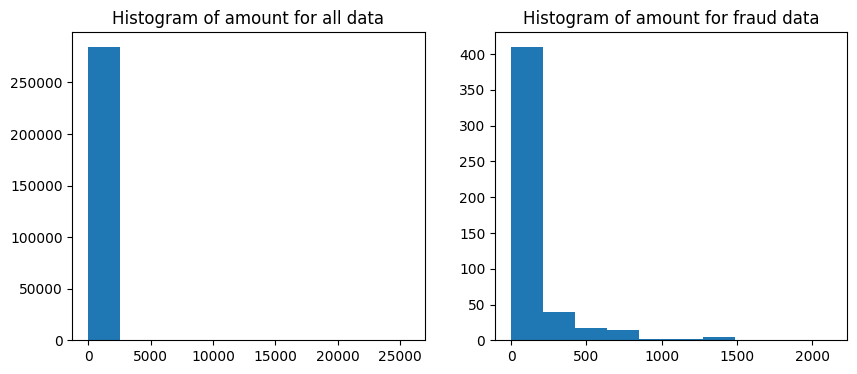

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].hist(df['Amount'])
ax[0].set_title("Histogram of amount for all data")
ax[1].hist(df[df['Class']==1]['Amount'])
ax[1].set_title("Histogram of amount for fraud data")
plt.show

In [10]:
def perc_99(a):
    return np.percentile(a,99)



In [11]:
df[['Amount','Class']].groupby("Class").agg({
    'Amount': [ 'mean', 'max', 'min', 'count','median',perc_99]
})

Amount                                         
             mean       max  min   count median    perc_99
Class                                                     
0       88.291022  25691.16  0.0  284315  22.00  1016.9664
1      122.211321   2125.87  0.0     492   9.25  1357.4279

In [12]:
np.percentile(df.Amount,99.73
              )

1916.6023760000126

Handling the outliers in Amount

Clipping the data at 3rd standard deviation.

In [13]:
df = df[df['Amount'] < np.percentile(df.Amount,99.73)]

<function matplotlib.pyplot.show(close=None, block=None)>

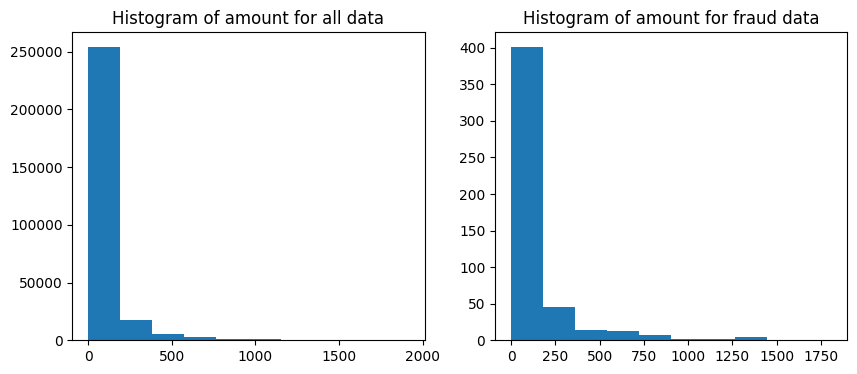

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].hist(df['Amount'])
ax[0].set_title("Histogram of amount for all data")
ax[1].hist(df[df['Class']==1]['Amount'])
ax[1].set_title("Histogram of amount for fraud data")
plt.show

Amount variable is right-tailed. Applying log might bring it to a much more useful distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

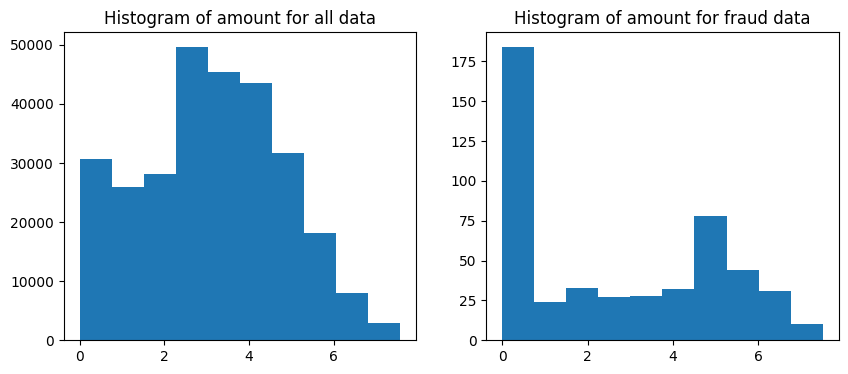

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].hist(np.log(df['Amount']+1))
ax[0].set_title("Histogram of amount for all data")
ax[1].hist(np.log(df[df['Class']==1]['Amount']+1))
ax[1].set_title("Histogram of amount for fraud data")
plt.show

Looking at the data, fraudsters seem to scam small amounts probably to not arouse any suspicion

In [16]:
df['decimal'] = df.Amount % 1
df['decimal'] = df['decimal'].round(2)

In [17]:
df['decimal'].fillna(0, inplace= True)

In [18]:
df['decimal'].describe()

count    284038.000000
mean          0.480226
std           0.380412
min           0.000000
25%           0.010000
50%           0.500000
75%           0.880000
max           0.990000
Name: decimal, dtype: float64

In [19]:
def round_num(a):
    rounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,0.25,0.75,0.99]
    count = sum(1 for val in a if val in rounds)
    return count

In [20]:
def round_num_perc(a):
    rounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0,0.25,0.75,0.99]
    count = sum(1 for val in a if val in rounds)
    return count/len(a)

In [21]:
df[['decimal','Class']].groupby("Class").agg({
    'decimal': [ 'mean','count','median',round_num,round_num_perc]
})

decimal                                        
           mean   count median round_num round_num_perc
Class                                                  
0      0.480408  283547   0.50    135905       0.479303
1      0.374949     491   0.28       250       0.509165

In [22]:
df['decimal'].nunique()

100

In [23]:
df['decimal'] = df['decimal'].astype('str')

In [24]:
df.decimal.unique()

array(['0.62', '0.69', '0.66', '0.5', '0.99', '0.67', '0.8', '0.2',
       '0.68', '0.89', '0.0', '0.71', '0.09', '0.28', '0.75', '0.43',
       '0.88', '0.45', '0.14', '0.77', '0.49', '0.53', '0.54', '0.35',
       '0.1', '0.34', '0.95', '0.9', '0.22', '0.76', '0.96', '0.84',
       '0.05', '0.94', '0.13', '0.51', '0.55', '0.97', '0.63', '0.72',
       '0.18', '0.79', '0.98', '0.46', '0.17', '0.01', '0.02', '0.4',
       '0.7', '0.85', '0.36', '0.78', '0.56', '0.47', '0.48', '0.6',
       '0.83', '0.12', '0.92', '0.31', '0.74', '0.91', '0.3', '0.39',
       '0.44', '0.21', '0.29', '0.27', '0.19', '0.57', '0.86', '0.93',
       '0.24', '0.87', '0.37', '0.07', '0.81', '0.26', '0.42', '0.65',
       '0.32', '0.38', '0.58', '0.82', '0.61', '0.11', '0.08', '0.03',
       '0.33', '0.15', '0.64', '0.25', '0.04', '0.41', '0.59', '0.23',
       '0.16', '0.52', '0.73', '0.06'], dtype=object)

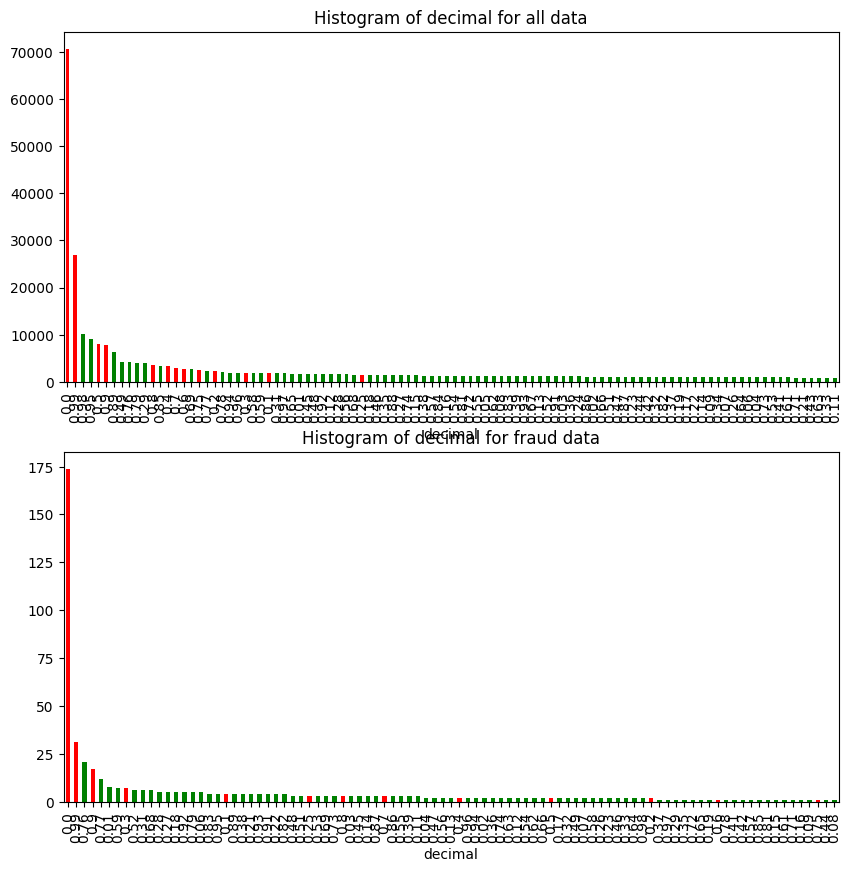

In [25]:
rounds = ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","0.0","0.25","0.75","0.99"]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

fraud_data_counts1 = df['decimal'].value_counts()
fraud_data_counts1.plot(kind='bar', color=['red' if x in rounds else 'green' for x in fraud_data_counts1.index], ax=ax[0])

ax[0].set_title("Histogram of decimal for all data")

fraud_data_counts = df[df['Class'] == 1]['decimal'].value_counts()
fraud_data_counts.plot(kind='bar', color=['red' if x in rounds else 'green' for x in fraud_data_counts.index], ax=ax[1])
ax[1].set_title("Histogram of decimal for fraud data")
plt.show()

In [26]:
df['decimal'].value_counts(ascending= False, normalize= True)[:10]

decimal
0.0     0.248798
0.99    0.094977
0.98    0.035721
0.95    0.032306
0.5     0.028186
0.9     0.027176
0.89    0.022261
0.49    0.015132
0.76    0.014554
0.79    0.014227
Name: proportion, dtype: float64

In [27]:
df[df['Class'] == 1]['decimal'].value_counts(ascending= False, normalize= True)[:10]

decimal
0.0     0.354379
0.99    0.063136
0.76    0.042770
0.9     0.034623
0.77    0.024440
0.01    0.016293
0.59    0.014257
0.3     0.014257
0.52    0.012220
0.31    0.012220
Name: proportion, dtype: float64

possible features:

decimal_0

is_rounded

In [28]:
df['is_round'] = df['decimal'].isin(rounds)

In [29]:
df['is_round'] = np.where(df['is_round'],1,0)

In [30]:
df['is_round'].value_counts()

is_round
0    147883
1    136155
Name: count, dtype: int64

In [31]:
df['is_round'] = df['is_round'].astype(int)

In [32]:
df.Time.describe()

count    284038.000000
mean      94815.788528
std       47492.141942
min           0.000000
25%       54218.250000
50%       84688.500000
75%      139326.000000
max      172792.000000
Name: Time, dtype: float64

In [33]:
grouped_data = df.groupby('Time')['Class'].mean().reset_index()
grouped_data = pd.DataFrame(grouped_data['Class'])

In [34]:
grouped_data.shape

(124499, 1)

In [35]:
#print(grouped_data.tail)
zeros_data = pd.DataFrame(np.zeros((1, 1)), columns=[ 'Class'])

# Extend the grouped_data DataFrame by concatenating it with the zeros DataFrame
grouped_data = pd.concat([grouped_data, zeros_data], axis = 0)

#print(grouped_data.tail)

In [36]:

# Reshape the data into (n_rows, 500) shape
#reshaped_data = grouped_data.pivot(index='Time', columns='Time', values='Class').fillna(0)
reshaped_data = np.array(grouped_data['Class']).reshape((-1,500))

In [37]:
grouped_data_sum = df.groupby('Time')['Class'].sum().reset_index()
grouped_data_sum = pd.DataFrame(grouped_data_sum['Class'])
#print(grouped_data_sum.tail)
#zeros_data = pd.DataFrame(np.zeros((1, 1)), columns=[ 'Class'])

# Extend the grouped_data_sum DataFrame by concatenating it with the zeros DataFrame to make it divisible by 500
grouped_data_sum = pd.concat([grouped_data_sum, zeros_data], axis = 0)

reshaped_data_sum = np.array(grouped_data_sum['Class']).reshape((-1,500))

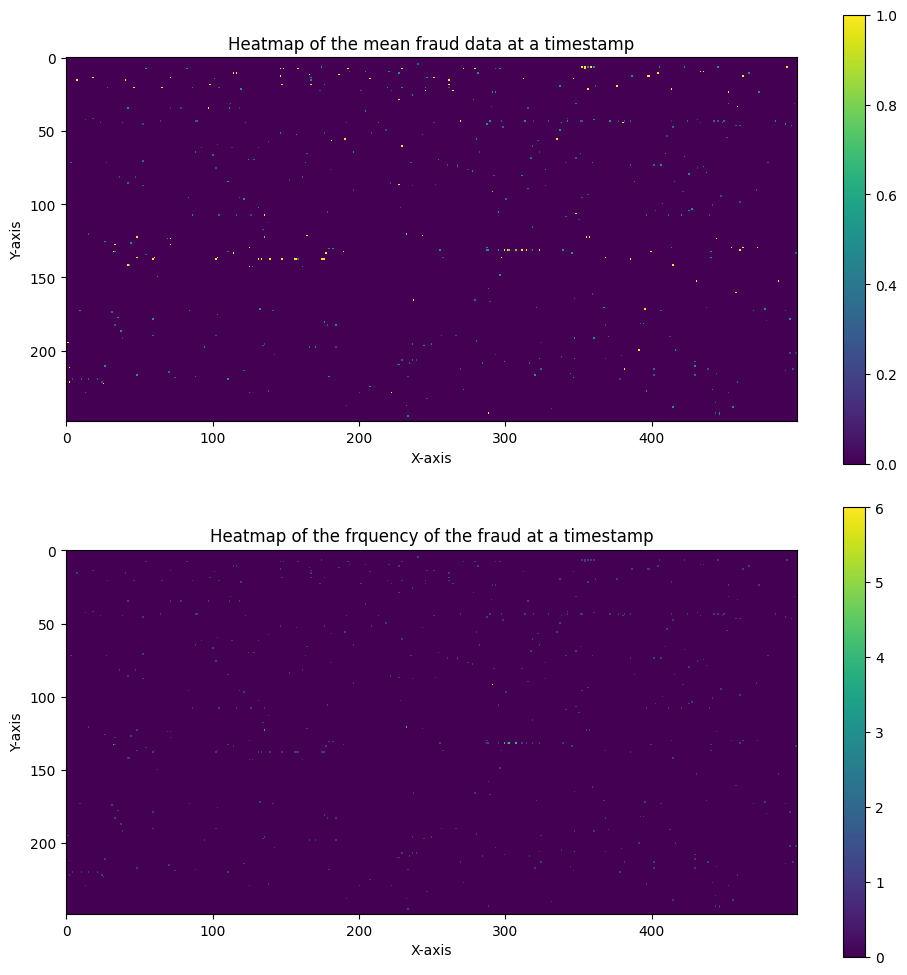

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot the first heatmap
im1 = ax[0].imshow(reshaped_data, cmap='viridis', interpolation='nearest')
ax[0].set_title('Heatmap of the mean fraud data at a timestamp')
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
fig.colorbar(im1, ax=ax[0], orientation='vertical')

# Plot the second heatmap
im2 = ax[1].imshow(reshaped_data_sum, cmap='viridis', interpolation='nearest')
ax[1].set_title('Heatmap of the frquency of the fraud at a timestamp')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
fig.colorbar(im2, ax=ax[1], orientation='vertical')

plt.tight_layout()
plt.show()

Moving average of fraud could be a useful variable
Inferring on data should also have moving average of fraud which could be tricky to implement

In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,is_round
count,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,...,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000
mean,94815.788528,0.014968,0.024795,0.011408,-0.005559,0.016113,-0.008922,-0.017849,0.004456,0.001227,...,0.002506,0.002960,-0.000330,0.001297,0.000269,-0.000534,-0.000176,80.094960,0.001729,0.479355
std,47492.141942,1.920720,1.539168,1.492932,1.408166,1.292387,1.296380,1.125566,1.184750,1.097180,...,0.721088,0.548913,0.605155,0.516529,0.481642,0.389081,0.319038,169.984255,0.041541,0.499574
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-23.669726,-26.160506,-43.557242,-73.216718,-13.434066,...,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000,0.000000
25%,54218.250000,-0.913210,-0.592162,-0.880175,-0.850327,-0.685585,-0.769414,-0.555598,-0.206874,-0.641357,...,-0.540515,-0.161000,-0.354740,-0.316066,-0.326642,-0.070458,-0.052951,5.500000,0.000000,0.000000
50%,84688.500000,0.024224,0.068686,0.183854,-0.022773,-0.051623,-0.276496,0.037985,0.023385,-0.050439,...,0.007992,-0.010886,0.040766,0.017418,-0.051766,0.001508,0.011158,21.950000,0.000000,0.000000
75%,139326.000000,1.316872,0.805518,1.029614,0.737313,0.613760,0.392587,0.565774,0.328474,0.597579,...,0.529387,0.147591,0.439098,0.350931,0.240773,0.091017,0.077622,76.100000,0.000000,1.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,16.614054,21.014587,20.007208,15.594995,...,10.503090,22.083545,4.022866,7.519589,3.517346,9.879903,33.847808,1916.590000,1.000000,1.000000


<Axes: >

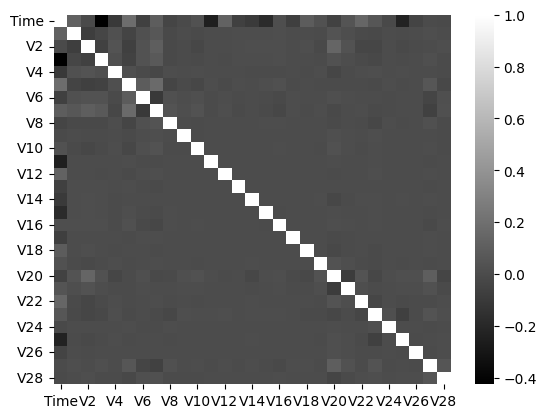

In [40]:
sns.heatmap(df.iloc[:,0:29].corr(),cmap = "gray")

In [41]:
selected_columns =[]
for i in df.columns[0:29]:

    anova_result = f_oneway(df[i], df['Class'])

    # Print the ANOVA result
    print("For ",i,":")
    print('ANOVA Result:')
    print('F-statistic:', anova_result.statistic)
    print('p-value:', anova_result.pvalue)

    # Interpret the result
    alpha = 0.1  # Significance level
    if anova_result.pvalue < alpha:
        print('The means of the groups are significantly different (reject the null hypothesis).')
        selected_columns.append(i)
    else:
        print('The means of the groups are not significantly different (fail to reject the null hypothesis).')

For  Time :
ANOVA Result:
F-statistic: 1132124.628486745
p-value: 0.0
The means of the groups are significantly different (reject the null hypothesis).
For  V1 :
ANOVA Result:
F-statistic: 13.48903291947287
p-value: 0.00023998383628561886
The means of the groups are significantly different (reject the null hypothesis).
For  V2 :
ANOVA Result:
F-statistic: 63.74347775207867
p-value: 1.4198353724393181e-15
The means of the groups are significantly different (reject the null hypothesis).
For  V3 :
ANOVA Result:
F-statistic: 11.929993946530523
p-value: 0.0005524138201058916
The means of the groups are significantly different (reject the null hypothesis).
For  V4 :
ANOVA Result:
F-statistic: 7.6008031816865955
p-value: 0.005834416716499463
The means of the groups are significantly different (reject the null hypothesis).
For  V5 :
ANOVA Result:
F-statistic: 35.15019236721839
p-value: 3.0540659788743824e-09
The means of the groups are significantly different (reject the null hypothesis).
For 

Some people on online forums suggested that statistical tests should be done on balanced data?

However since there are enough samples in each class that should be enough.
May be normality across classes is a concern - so let me check the data distributions quickly

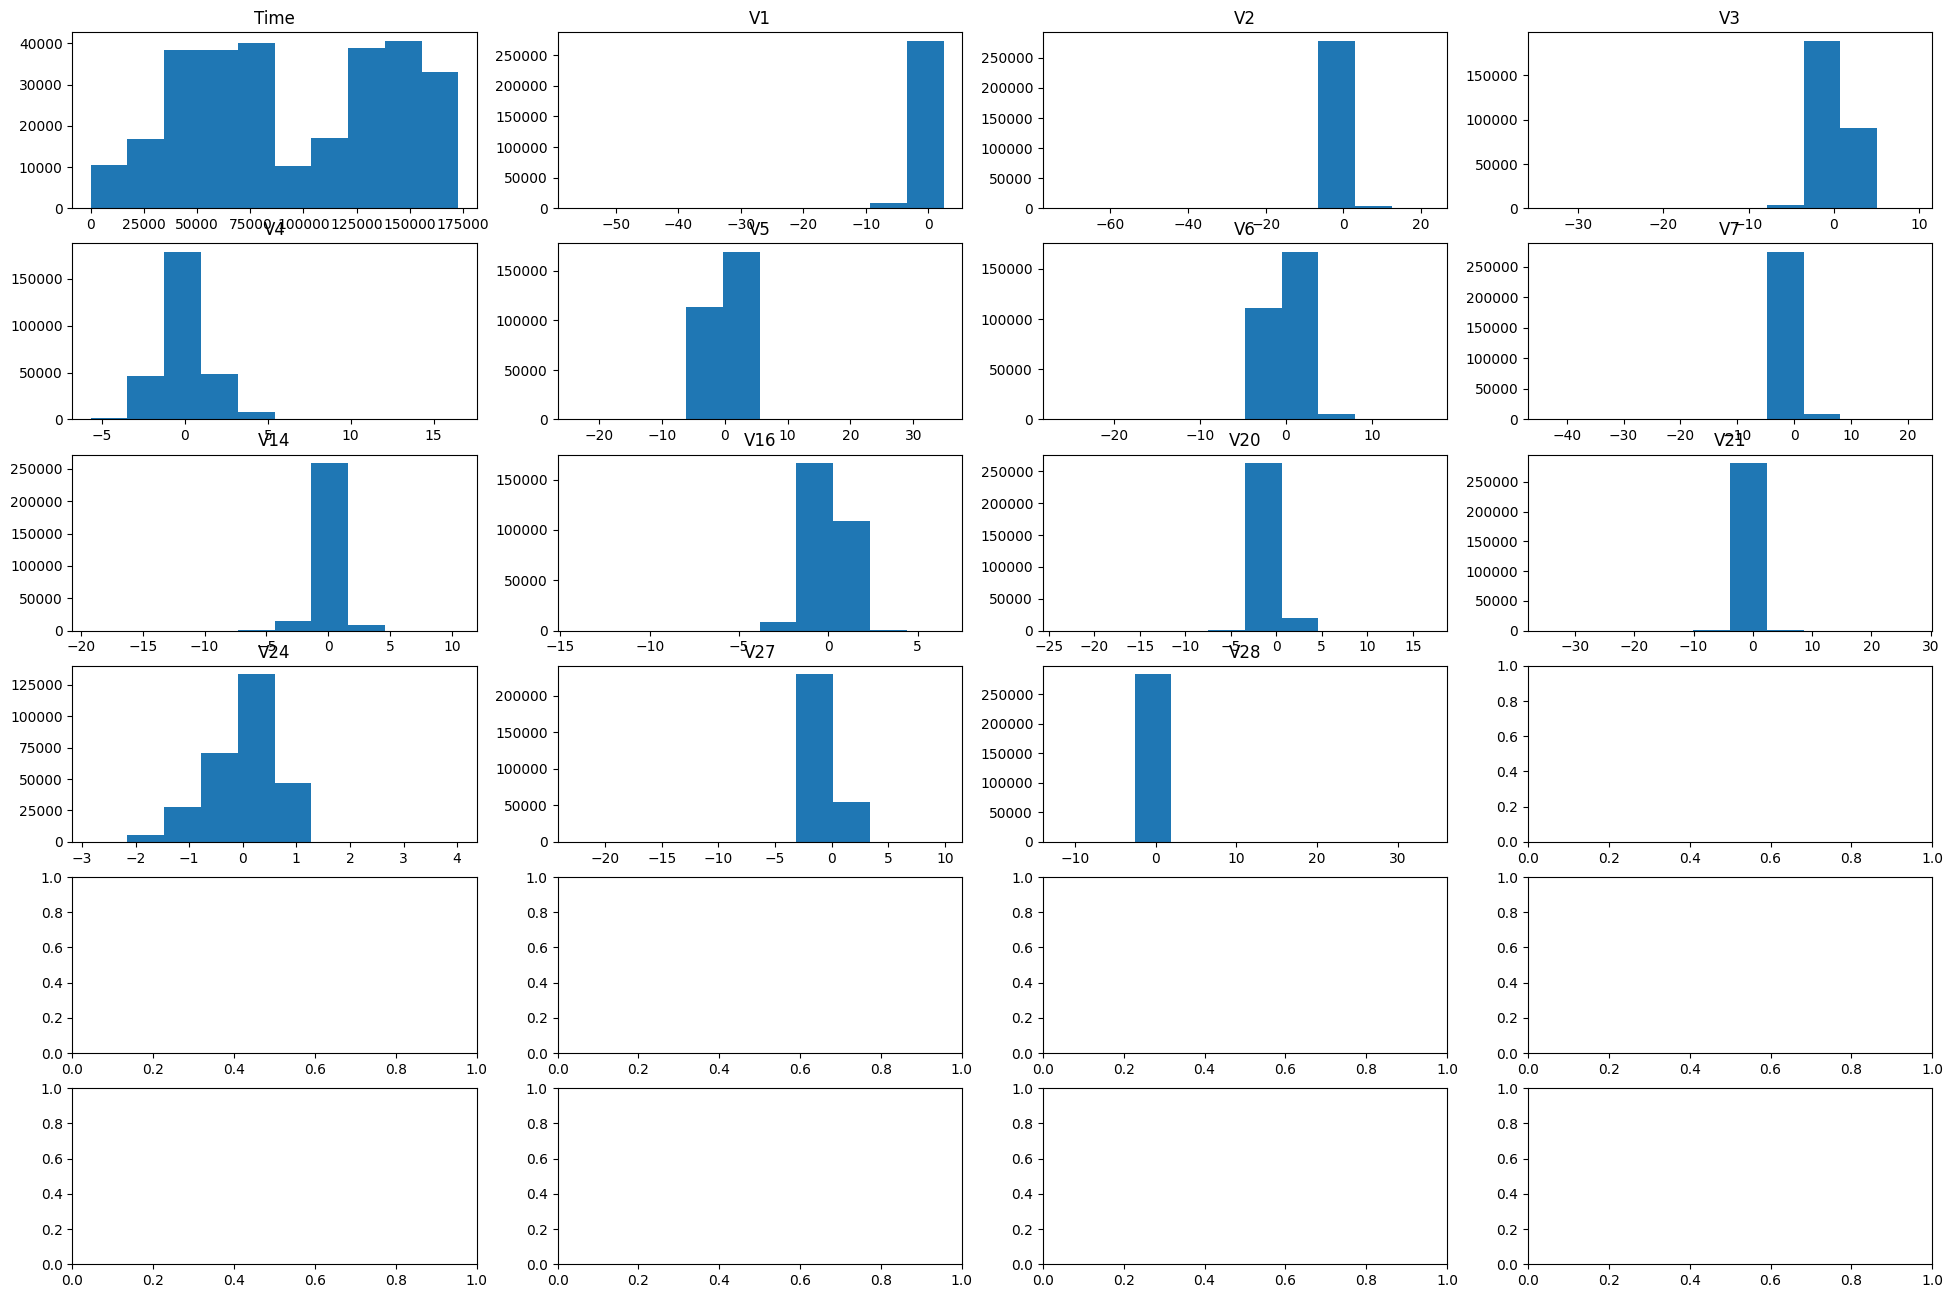

In [42]:
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(24, 16))
for i, name in enumerate(selected_columns):
    x = i // 4
    y = i % 4
    ax[x,y].hist(df[name])
    ax[x,y].set_title(name)
plt.show()

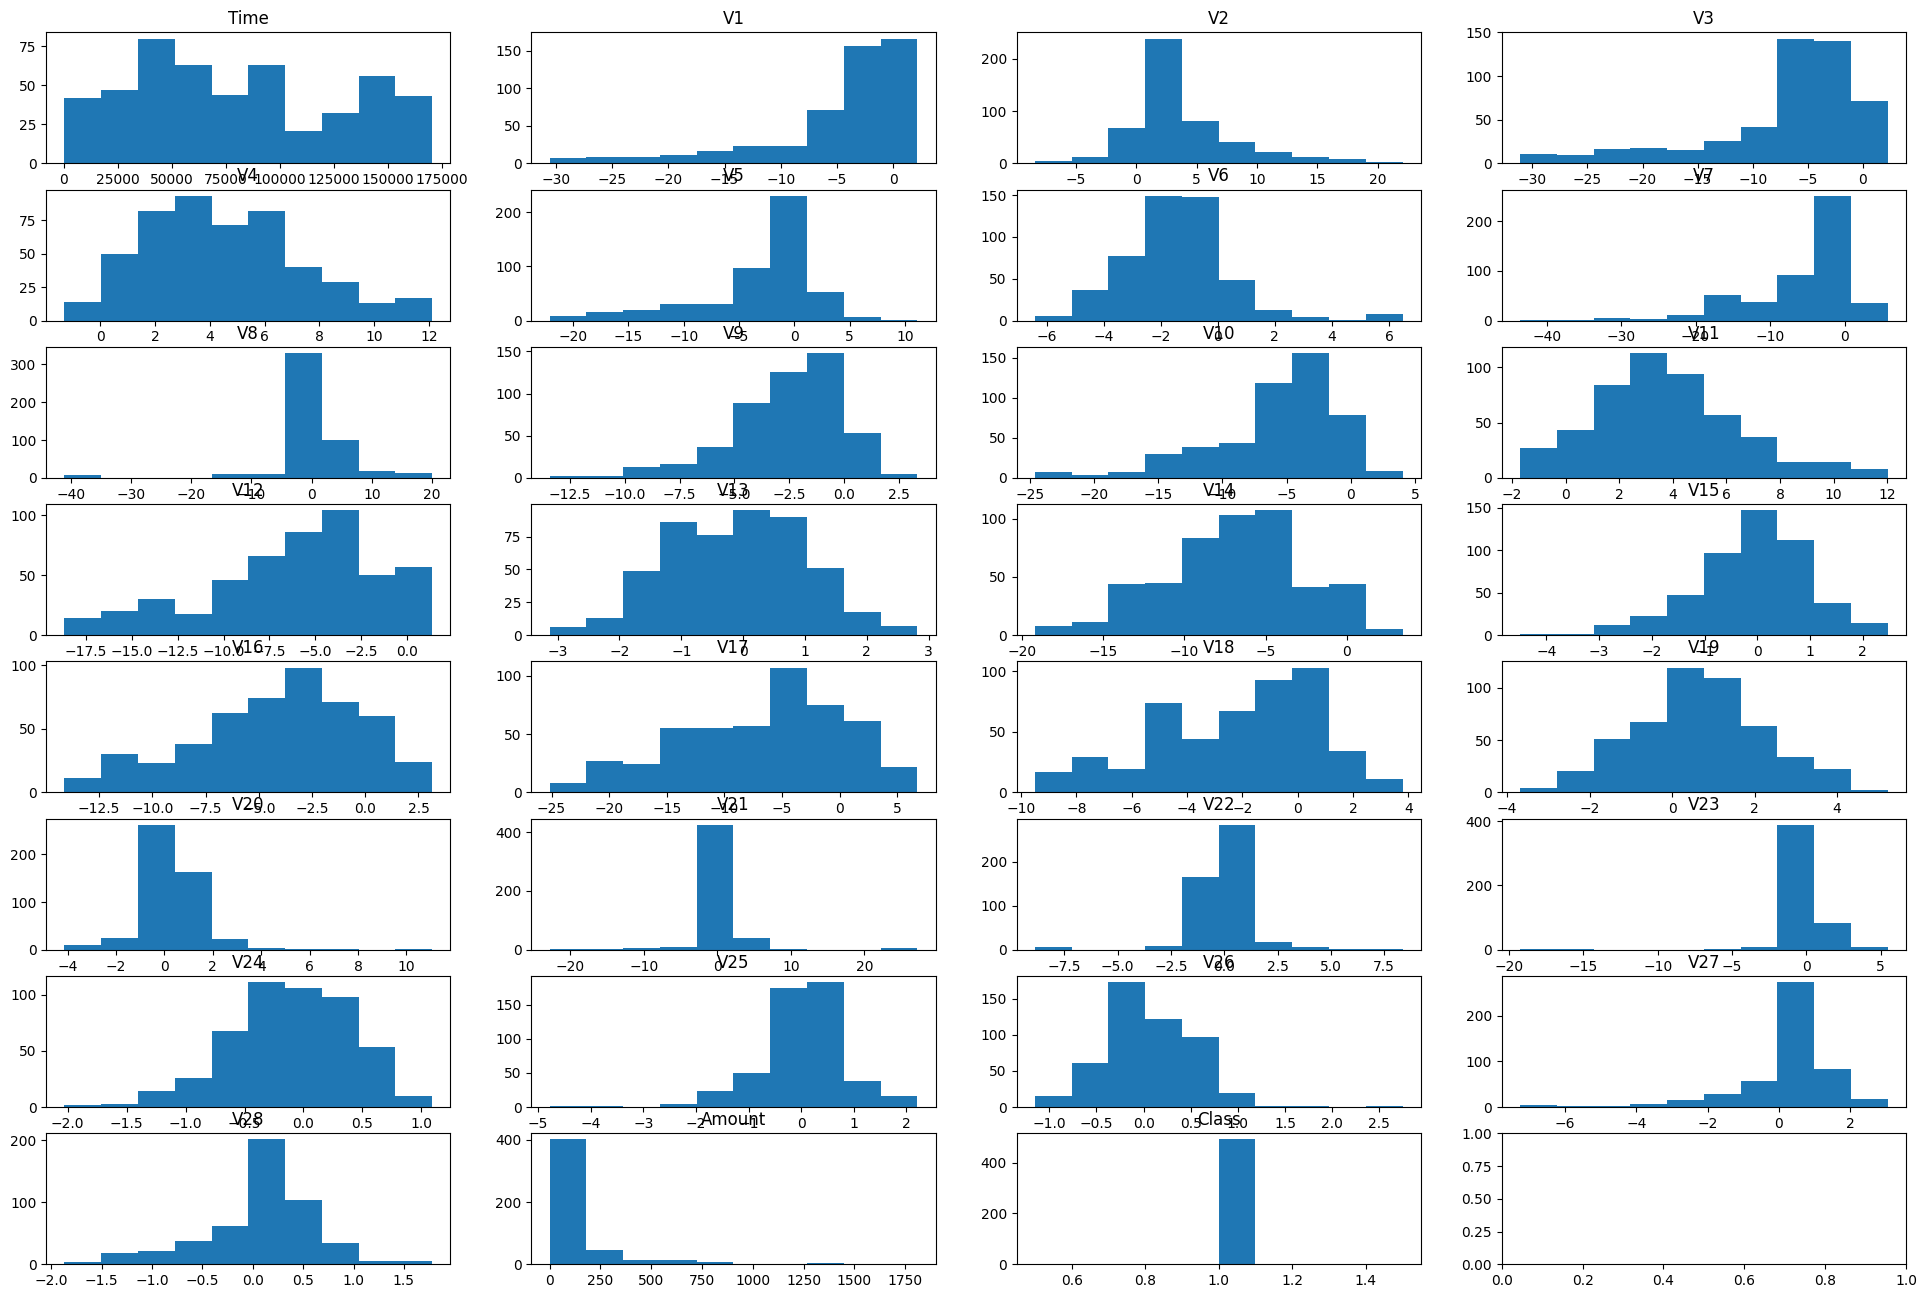

In [43]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(24, 16))
for i, name in enumerate(df.columns[:-2]):
    x = i // 4
    y = i % 4
    ax[x,y].hist(df[df.Class==1][name])
    ax[x,y].set_title(name)
plt.show()

Oops some variables don't seem to hold normal distributions 

Let's use Wilcoxon Rank-sum test as it doesn't require the data to be normal.

In [44]:
from scipy.stats import ranksums
for i, name in enumerate(df.columns[0:29]):
    print("for",name)
    statistic, p_value = ranksums(df[name], df['Class'])

    # Print the test statistic and p-value
    print("Wilcoxon Rank-Sum Test Statistic:", statistic)
    print("P-value:", p_value)

    # Interpret the results
    alpha = 0.1 # using 0.1 being sensitive to information loss
    if p_value < alpha:
        print("The difference between the two samples is statistically significant (reject the null hypothesis).")
    else:
        print("The difference between the two samples is not statistically significant (fail to reject the null hypothesis).")


for Time
Wilcoxon Rank-Sum Test Statistic: 652.7252326128397
P-value: 0.0
The difference between the two samples is statistically significant (reject the null hypothesis).
for V1
Wilcoxon Rank-Sum Test Statistic: 5.909776509568351
P-value: 3.4257218787667115e-09
The difference between the two samples is statistically significant (reject the null hypothesis).
for V2
Wilcoxon Rank-Sum Test Statistic: 38.4975634712714
P-value: 0.0
The difference between the two samples is statistically significant (reject the null hypothesis).
for V3
Wilcoxon Rank-Sum Test Statistic: 66.52342038958629
P-value: 0.0
The difference between the two samples is statistically significant (reject the null hypothesis).
for V4
Wilcoxon Rank-Sum Test Statistic: -9.747737911648361
P-value: 1.886243870944278e-22
The difference between the two samples is statistically significant (reject the null hypothesis).
for V5
Wilcoxon Rank-Sum Test Statistic: -29.08859462366674
P-value: 5.00452667147794e-186
The difference betwe

In [45]:
selected_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'is_round']

### Clip outliers to max value

In [46]:
df[selected_columns].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_round
count,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,...,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000,284038.000000
mean,94815.788528,0.014968,0.024795,0.011408,-0.005559,0.016113,-0.008922,-0.017849,0.004456,0.001227,...,-0.002774,0.002506,0.002960,-0.000330,0.001297,0.000269,-0.000534,-0.000176,80.094960,0.479355
std,47492.141942,1.920720,1.539168,1.492932,1.408166,1.292387,1.296380,1.125566,1.184750,1.097180,...,0.723042,0.721088,0.548913,0.605155,0.516529,0.481642,0.389081,0.319038,169.984255,0.499574
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-23.669726,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54218.250000,-0.913210,-0.592162,-0.880175,-0.850327,-0.685585,-0.769414,-0.555598,-0.206874,-0.641357,...,-0.228536,-0.540515,-0.161000,-0.354740,-0.316066,-0.326642,-0.070458,-0.052951,5.500000,0.000000
50%,84688.500000,0.024224,0.068686,0.183854,-0.022773,-0.051623,-0.276496,0.037985,0.023385,-0.050439,...,-0.030046,0.007992,-0.010886,0.040766,0.017418,-0.051766,0.001508,0.011158,21.950000,0.000000
75%,139326.000000,1.316872,0.805518,1.029614,0.737313,0.613760,0.392587,0.565774,0.328474,0.597579,...,0.184939,0.529387,0.147591,0.439098,0.350931,0.240773,0.091017,0.077622,76.100000,1.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,16.614054,21.014587,20.007208,15.594995,...,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,9.879903,33.847808,1916.590000,1.000000


In [47]:
for i, name in enumerate(selected_columns):
    percentile_99_7 = np.percentile(df[name], 99.7)
    percentile_0_03 = np.percentile(df[name], 0.3)

    # Clip values based on percentiles
    df[name] = np.where(df[name] > percentile_99_7, percentile_99_7, df[name])
    df[name] = np.where(df[name] < percentile_0_03, percentile_0_03, df[name])

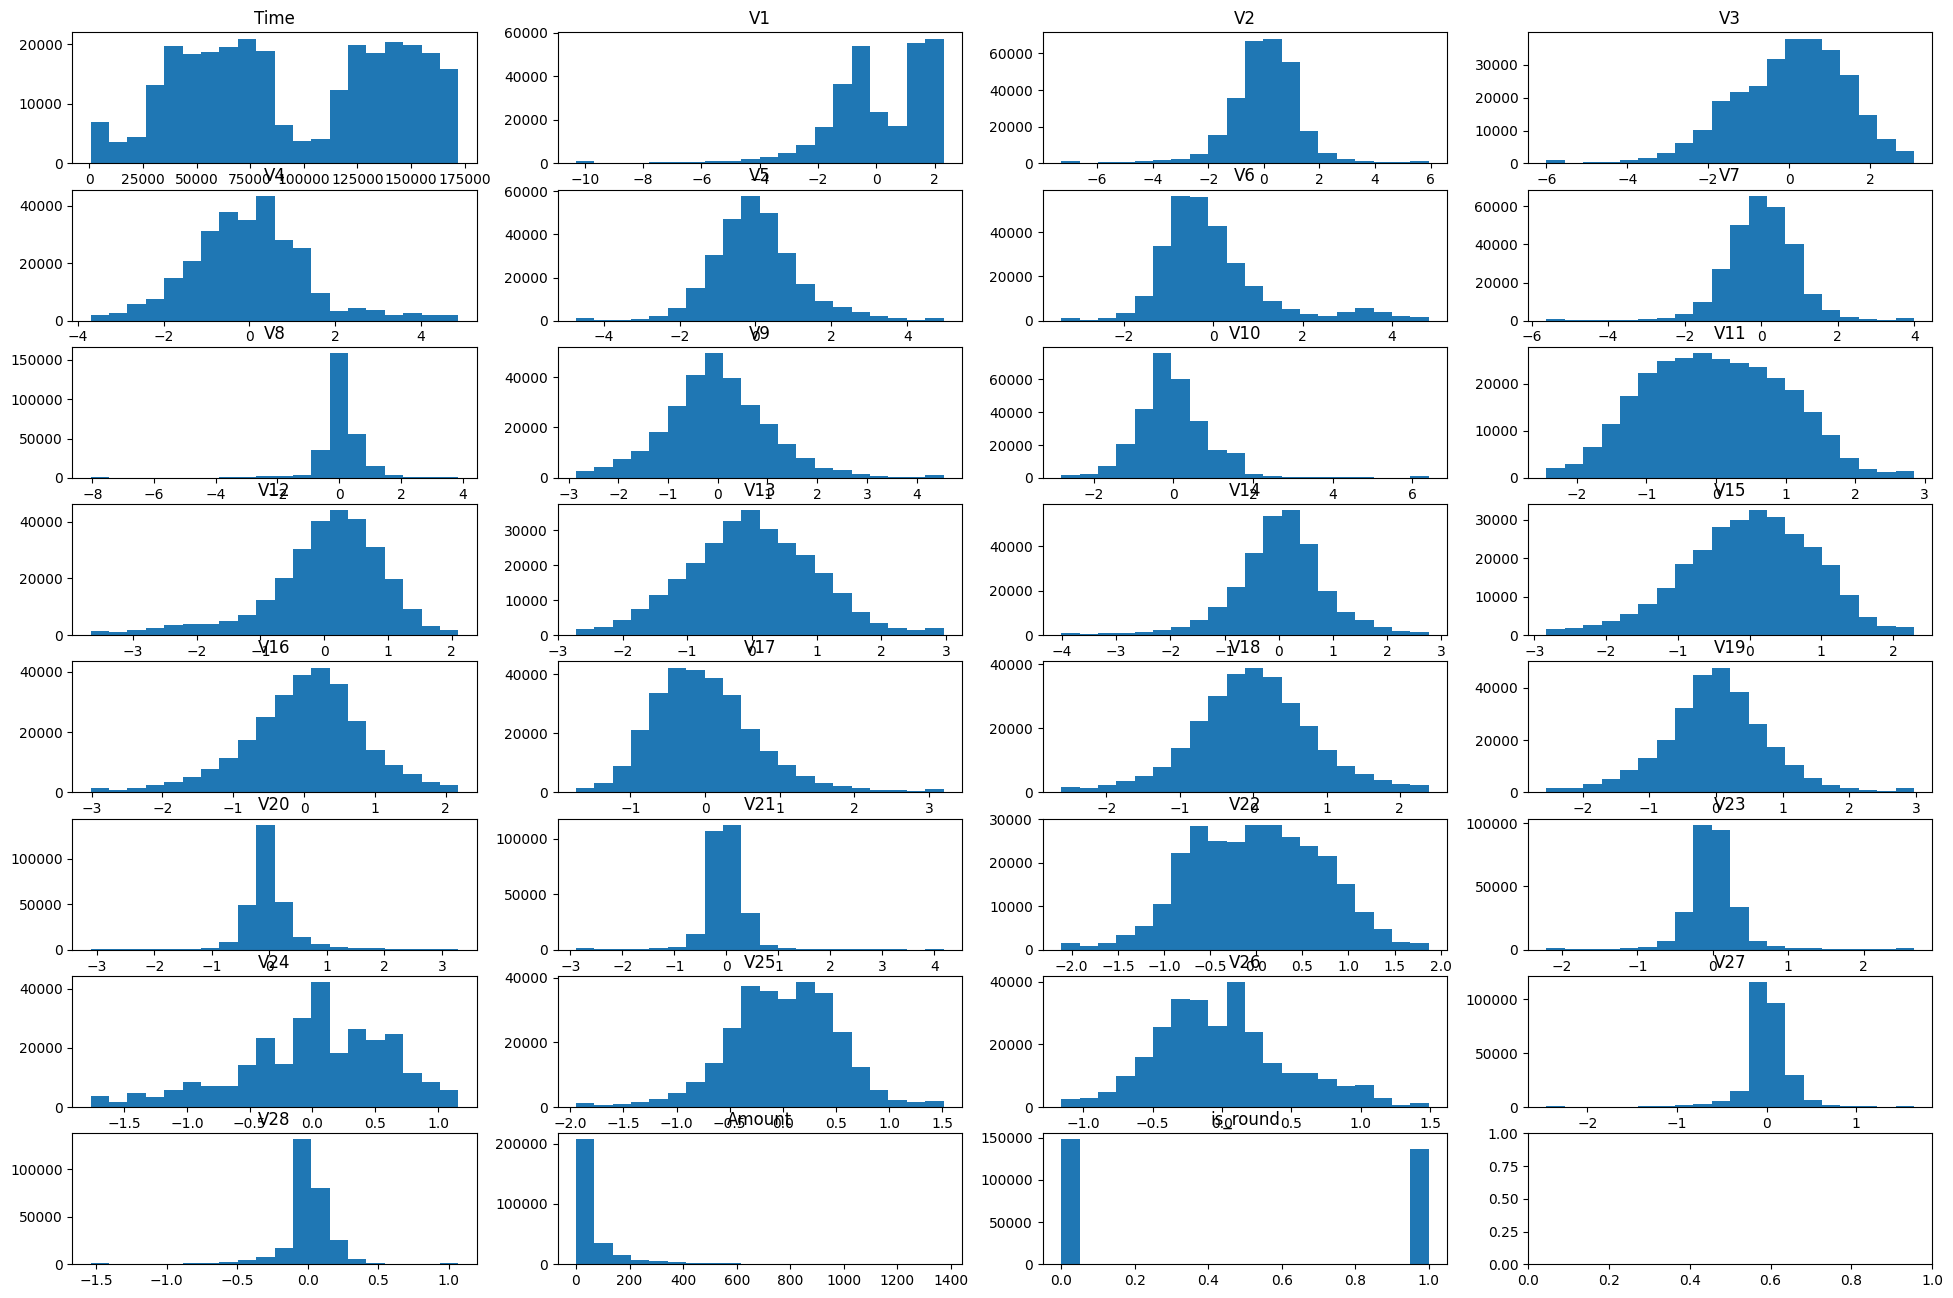

In [48]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(24, 16))
for i, name in enumerate(selected_columns):
    y = i % 4
    x = i // 4
    ax[x,y].hist(df[name],bins =20)
    ax[x,y].set_title(name)
plt.show()

In [49]:
df["log_Amount"] = np.log(df["Amount"]+1)

In [50]:
#selected_columns.append("is_round")
selected_columns.append("log_Amount")

In [51]:
test = df.iloc[round(len(df)*0.8):,:]
train = df.iloc[:round(len(df)*0.8),:]

Time has a bi-modal distribution - curious.

#### Scaling

In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,decimal,is_round,log_Amount
0,-1.982965,-0.774343,-0.080081,1.792380,0.999720,-0.299426,0.371842,0.253959,0.090830,0.340373,...,0.112941,0.251360,-0.396570,0.407779,-0.089886,0.428486,0,0.62,-0.959528,1.144972
1,-1.982965,0.647881,0.170937,0.102902,0.329058,0.038915,-0.061464,-0.069198,0.076325,-0.238526,...,-0.565993,0.327714,0.267811,-0.030119,0.075244,-0.468066,0,0.69,-0.959528,-1.118730
2,-1.982965,-0.773533,-1.018723,1.248339,0.279750,-0.439470,1.436211,0.814065,0.249768,-1.415773,...,-1.149222,-0.650279,-0.291077,-0.172570,-0.268500,1.826065,0,0.66,-0.959528,1.709209
3,-1.982965,-0.554998,-0.163360,1.262443,-0.616679,-0.020819,0.996105,0.251940,0.388204,-1.296452,...,-1.960880,1.276837,-0.465777,0.190167,0.290941,0.269104,0,0.5,1.042179,1.028737
4,-1.982965,-0.661992,0.623887,1.088299,0.296520,-0.357926,0.080346,0.612579,-0.303088,0.764771,...,0.237018,-0.409873,1.061664,0.671559,1.000321,-0.057408,0,0.99,1.042179,0.685888


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [67]:
selected_columns.remove("Amount")
selected_columns.remove("Time")

In [68]:
selected_columns

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'is_round',
 'log_Amount']

The real battle of Data Imbalance

Undersampling

Oversampling

mixed-sampling - challenge is model learns a different distribution than the actual one.

Brainstorming:

1. train a neural network - at first with an equal distribution of data at the start and gradually moving to the actual distributions in later training instances.

2. Isolation Forest

3. Autoencoders

4. One-class SVM 

Autoencoders don't need oversampling as they don't look at minority class.

For isolation forest, oversampling might be counter-productive as the model tries to isolate anamolies. When spatial based imputing is done, it effectively means points are added near to other anamolies making it difficult for the isolation forest to isolate the points. Dimensionality reduction might be a good idea.

One-class SVM might be a good idea after a feature reduction step through t-SNE or UMAP. Oversampling is needed.

Training a neural network with equal distibution at first and later moving to actual distribution is a decent idea. However, it is not my first choice right now. It's worth trying it but I wouldn't bet on it over others.

### Autoencoder

In [55]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [69]:

input_dim = df[selected_columns].shape[1]


autoencoder = tf.keras.models.Sequential([
    
   
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'), #Experiment with architecture to find the quickest convergence
    #tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    
    # reconstruction / decode
    #tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])
adam_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01,
                                                            beta_1=0.9,
                                                            beta_2=0.999,
                                                            epsilon=1e-07,)


autoencoder.compile(optimizer=adam_optimizer, 
                    loss="mse",
                    metrics=["acc"])

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 16)                496       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 8)                 40        
                                                                 
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 30)               

In [70]:
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)
cb = [early_stop, save_model]

In [71]:
safe = train[train.Class == 0][selected_columns].sample(20000)
safe_valid = train[train.Class == 0][selected_columns].sample(3000)

In [72]:
BATCH_SIZE = 256
EPOCHS = 1000

In [73]:
history = autoencoder.fit(
    safe, safe,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(safe_valid, safe_valid)
)

Epoch 1/1000


79/79 [==============================] - 3s 13ms/step - loss: 0.7255 - acc: 0.7510 - val_loss: 0.5779 - val_acc: 0.8163
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.5524 - acc: 0.8311 - val_loss: 0.5255 - val_acc: 0.8473
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.5143 - acc: 0.8464 - val_loss: 0.4997 - val_acc: 0.8560
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4903 - acc: 0.8525 - val_loss: 0.4784 - val_acc: 0.8587
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4735 - acc: 0.8540 - val_loss: 0.4654 - val_acc: 0.8673
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4642 - acc: 0.8568 - val_loss: 0.4632 - val_acc: 0.8550
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4593 - acc: 0.8549 - val_loss: 0.4550 - val_acc: 0.8693
Epoch 8/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.4553 - acc: 

In [79]:
reconstructions = autoencoder.predict(test[selected_columns])

1776/1776 [==============================] - 2s 1ms/step


In [80]:
mse = np.mean(np.power(test[selected_columns] - reconstructions, 2), axis=1)

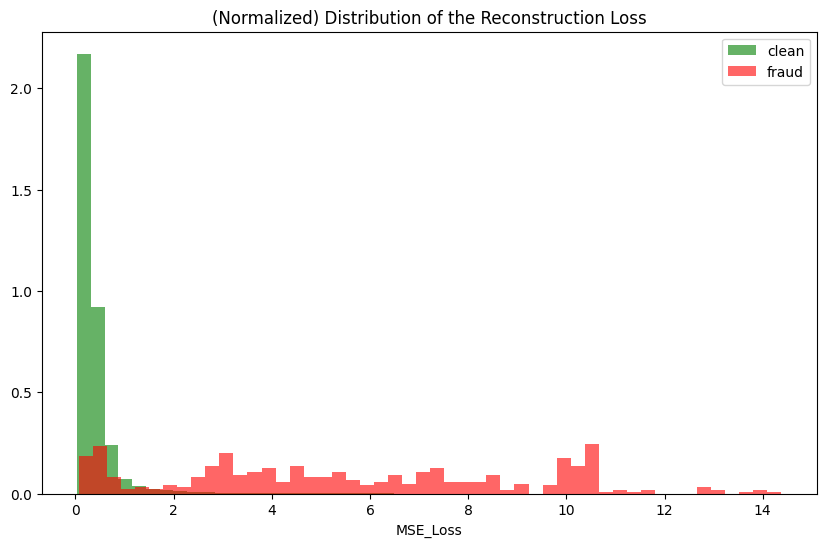

In [143]:
clean = mse[df.Class==0]
fraud = mse[df.Class==1]

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("MSE_Loss")
plt.legend()
plt.show()

In [96]:
thresh = 2.2
ae_pred = np.where(mse>thresh,1,0)

[[9.99731510e-01 9.36170213e-01]
 [2.68490012e-04 6.38297872e-02]]


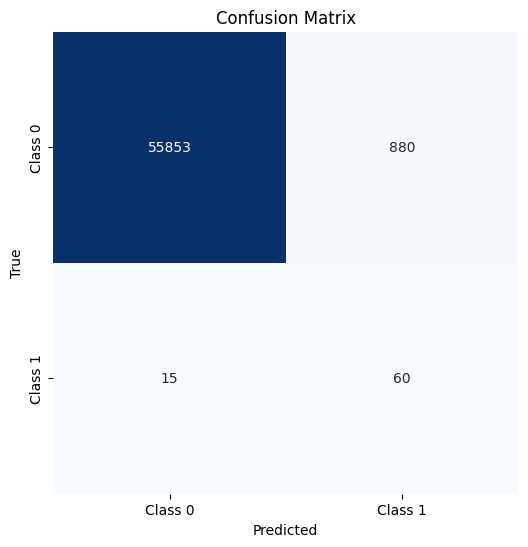

In [97]:
cm = confusion_matrix(test["Class"], ae_pred)
print(confusion_matrix(test["Class"], ae_pred,normalize= "pred"))
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Ideally the thresh should be determined from the training data results
It should be selected in such a way that most of the fraud cases are caught while still keeping the false positives to a minimum.

i.e. maximise the fraud detection while minimising false positives

In [107]:
reconstructions = autoencoder.predict(train[selected_columns])

7101/7101 [==============================] - 10s 1ms/step


In [108]:
mse = np.mean(np.power(train[selected_columns] - reconstructions, 2), axis=1)

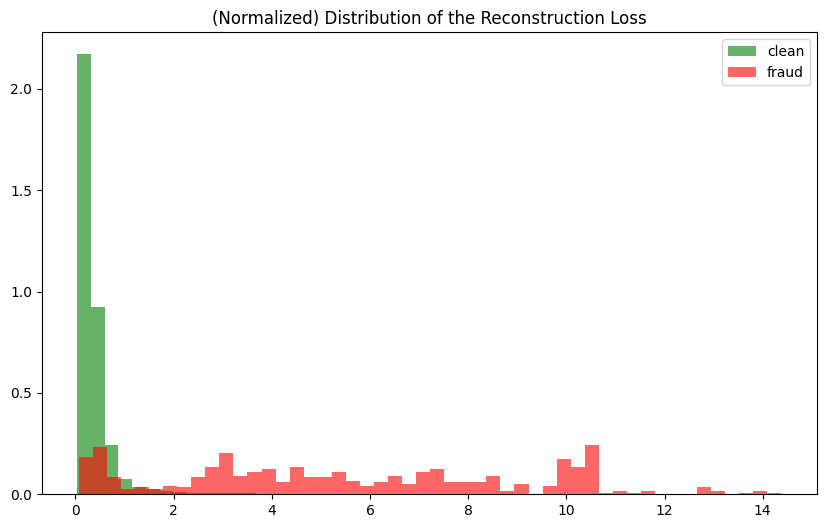

In [109]:
clean_train = mse[df.Class==0]
fraud_train = mse[df.Class==1]

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(clean_train, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud_train, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [130]:
fraud_accuracy = []
false_pos = []
threshold = []
for i in range(10,120,1):
    thresh = i/10
    ae_pred_iter = np.where(mse>thresh,1,0)
    cm = confusion_matrix(train["Class"], ae_pred_iter)
    threshold.append(i/10)
    fraud_accuracy.append(cm[1,1]/(cm[1,0]+cm[1,1]))
    false_pos.append(cm[0,1]/(cm[0,0]+cm[0,1]))
    

metrics = pd.DataFrame({'Threshold': threshold, 'Fraud_Accuracy': fraud_accuracy, 'False_Positive': false_pos})



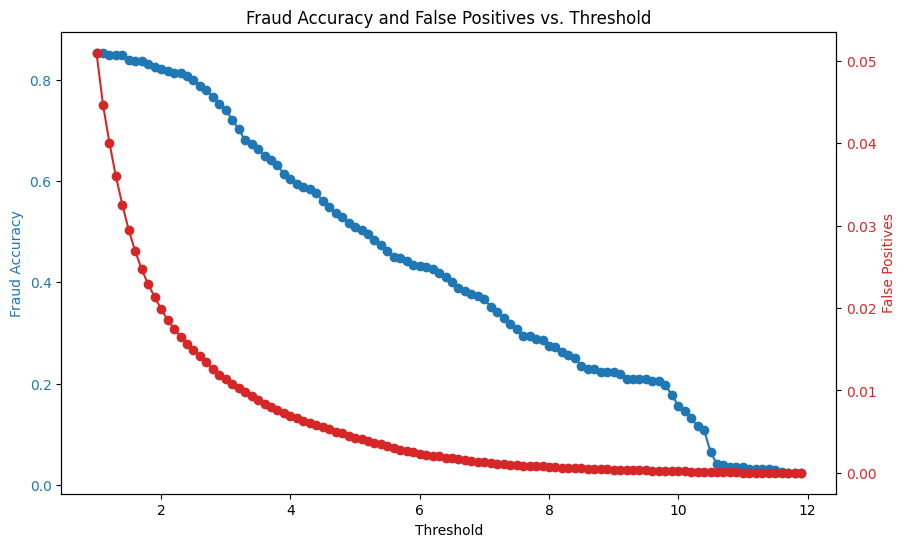

In [131]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot fraud accuracy on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Fraud Accuracy', color=color)
ax1.plot(threshold, fraud_accuracy, label='Fraud Accuracy', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for false positives
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('False Positives', color=color)
ax2.plot(threshold, false_pos, label='False Positives', color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Fraud Accuracy and False Positives vs. Threshold')

# Show the plot
plt.show()

If we draw a vertical line at any threshold point we get the relevant fraud detection accuracy and the cost (false detection rate)

Since we are sensitive to fraud detection, we might want to capture a lot more fraud cases.
looking at the graphs 2.8 seems like a good number

In [139]:
reconstructions_test = autoencoder.predict(test[selected_columns])

1776/1776 [==============================] - 2s 1ms/step


In [140]:
mse_test = np.mean(np.power(test[selected_columns] - reconstructions_test, 2), axis=1)

In [141]:
thresh = 2.8
ae_pred_test = np.where(mse_test>thresh,1,0)

[[9.99608011e-01 9.22514620e-01]
 [3.91989167e-04 7.74853801e-02]]


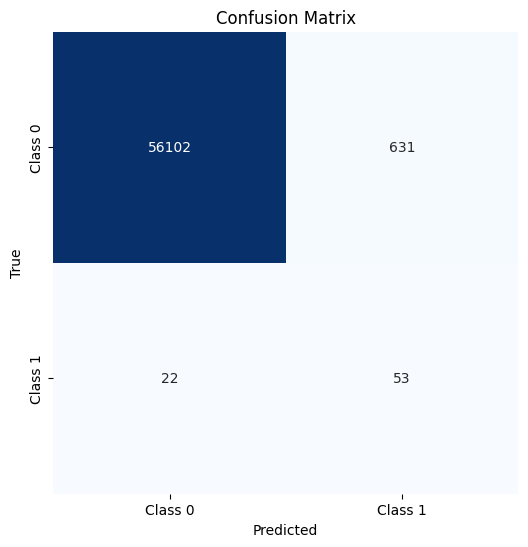

In [142]:
cm = confusion_matrix(test["Class"], ae_pred_test)
print(confusion_matrix(test["Class"], ae_pred_test,normalize= "pred"))
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Further parameter tuning might result in improved results

### hyper-parameter tuned AE

In [89]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [88]:
def build_autoencoder(hp):
    # Hyperparameters to tune
    #encoding_dim = hp.Int('encoding_dim', 32, 256, step=32)
    activation = hp.Choice('activation', values=['elu','relu', 'tanh', 'sigmoid'])
    l_rate = hp.Choice('learning_rate', values=[0.01,0.001,0.005])
    b_rate = hp.Choice('learning_rate', values=[0.9,0.95,0.99])

    # Input layer
    autoencoder = tf.keras.models.Sequential([
        
    
        tf.keras.layers.Dense(input_dim, activation=activation, input_shape=(input_dim, )), 
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(8, activation=activation), #Experiment with architecture to find the quickest convergence
        #tf.keras.layers.Dense(4, activation=activation),
        tf.keras.layers.Dense(4, activation=activation),
        
        # reconstruction / decode
        #tf.keras.layers.Dense(4, activation=activation),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(input_dim, activation=activation)
        
    ])
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate= l_rate,
                                                                beta_1= b_rate,
                                                                beta_2=0.999,
                                                                epsilon=1e-07,)


    autoencoder.compile(optimizer=adam_optimizer, 
                        loss="mse",
                        metrics=["acc"])
    
    early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1, 
    mode='min',
    restore_best_weights=True
    )
    
    return autoencoder


In [91]:
input_dim = df[selected_columns].shape[1]

# Instantiate the RandomSearch tuner
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials = 25,  
    directory='tuner_dir',
    project_name='autoencoder_tuning'
)

# Search for the best hyperparameters
tuner.search(safe, safe, validation_data=(safe_valid, safe_valid), epochs=250, callbacks=cb)

Trial 11 Complete [00h 05m 01s]
val_loss: 0.947526216506958

Best val_loss So Far: 0.39019450545310974
Total elapsed time: 01h 40m 39s


In [98]:
reconstructions = autoencoder.predict(test[selected_columns])

1776/1776 [==============================] - 2s 1ms/step


In [99]:
mse = np.mean(np.power(test[selected_columns] - reconstructions, 2), axis=1)

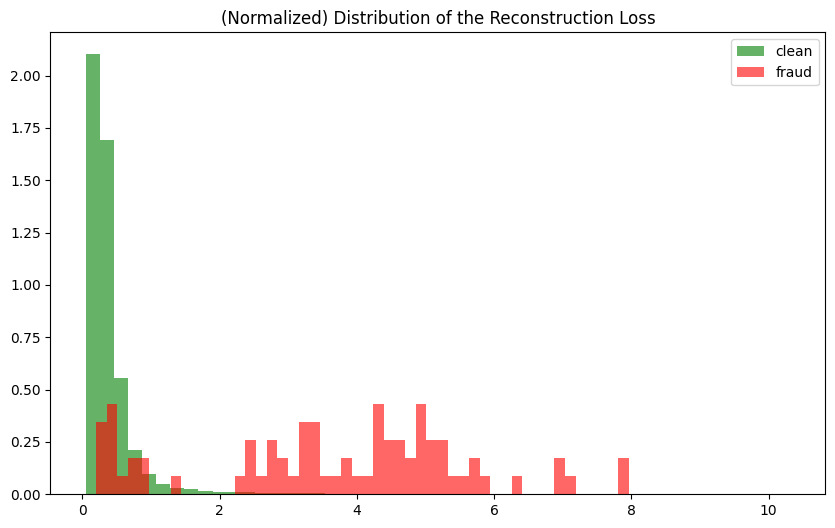

In [100]:
clean = mse[df.Class==0]
fraud = mse[df.Class==1]

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [105]:
ae_pred = np.where(mse>2.2,1,0)

[[9.99731510e-01 9.36170213e-01]
 [2.68490012e-04 6.38297872e-02]]


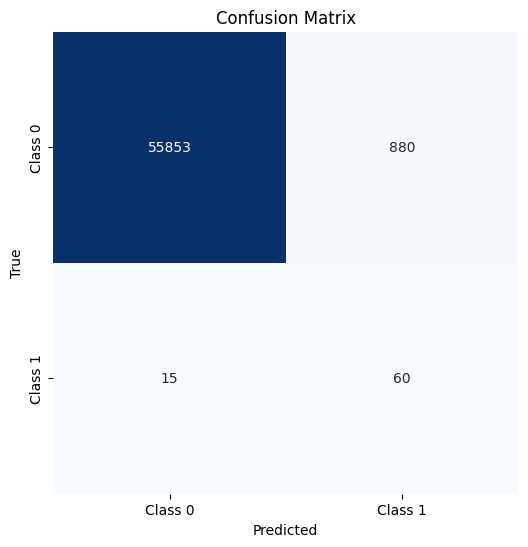

In [106]:
cm = confusion_matrix(test["Class"], ae_pred)
print(confusion_matrix(test["Class"], ae_pred,normalize= "pred"))
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

selected_columns_if = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'decimal']

In [ ]:
clf = IsolationForest(contamination=0.002,n_estimators= 250)
clf.fit(df[selected_columns])

# Predict outliers
y_pred = clf.predict(df[selected_columns])

c:\Users\Lohit Reddy\anaconda3a\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_bin = np.where(y_pred == -1, 1, 0)

[[283150    397]
 [   319    172]]


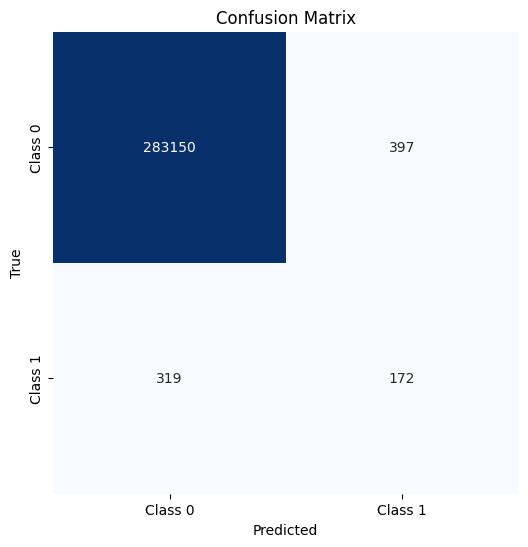

In [ ]:
cm = confusion_matrix(df["Class"], y_pred_bin)
print(cm)
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Not quite what we wanted. Let's try t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(df[selected_columns])

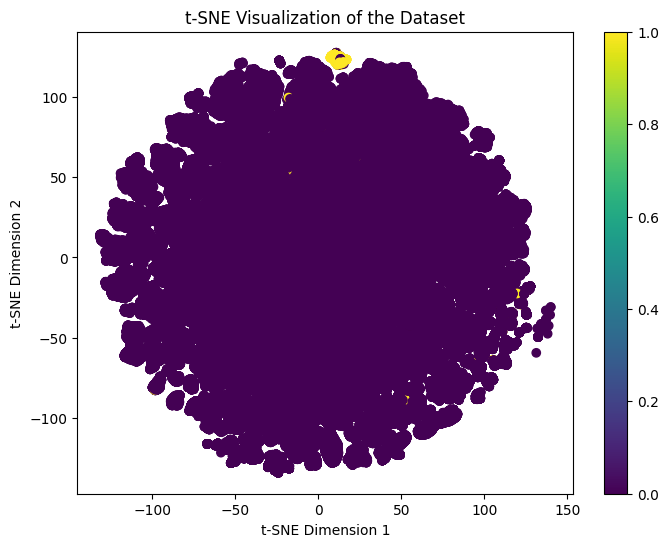

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['Class'], cmap='viridis')
plt.colorbar()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of the Dataset')
plt.show()

The two classes are not cleanly seperated, using a third dimension in tSNE might yeild a better seperation

In [ ]:
clf = IsolationForest(contamination=0.002,n_estimators= 250)
clf.fit(X_embedded)

# Predict outliers
y_pred = clf.predict(X_embedded)

In [ ]:
y_pred_bin = np.where(y_pred == -1, 1, 0)

[[283189    358]
 [   280    211]]


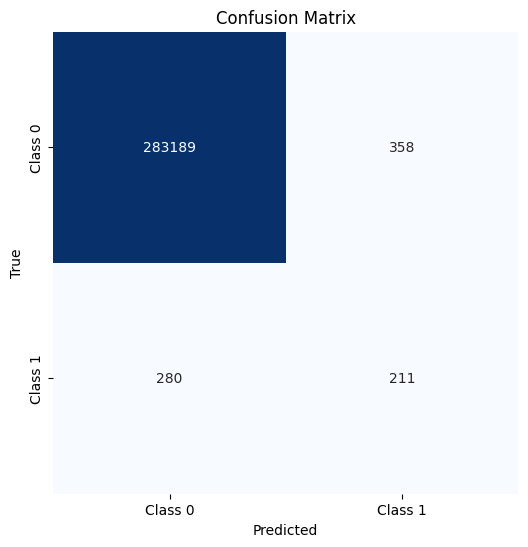

In [ ]:
cm = confusion_matrix(df["Class"], y_pred_bin)
print(confusion_matrix(df["Class"], y_pred_bin,normalize= "pred"))
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1]:
y_pred = clf.predict(X_embedded.iloc[:round(len(df)*0.8),:])
y_pred_bin = np.where(y_pred == -1, 1, 0)

NameError: name 'clf' is not defined

[[283189    358]
 [   280    211]]


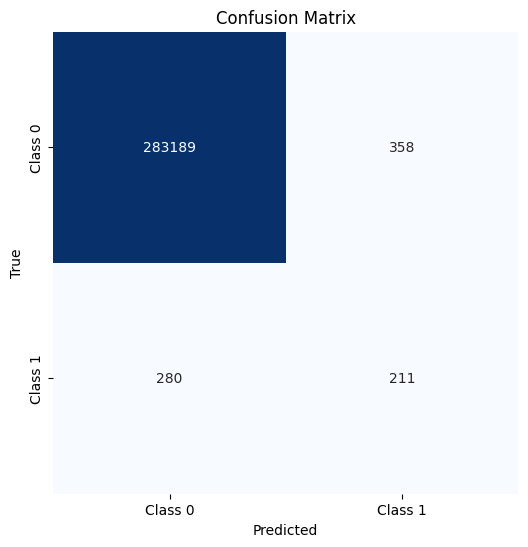

In [ ]:
cm = confusion_matrix(df["Class"], y_pred_bin)
print(confusion_matrix(df["Class"], y_pred_bin,normalize= "pred"))
# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

We have improved the performace of the model. Nice!

### Oversampling minor class for supervised learning